<a href="https://colab.research.google.com/github/Hee0305/PDM06/blob/main/py-tensorflow/DL2_CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료
- pooling: feature의 대표적 특징 추출 후 계산(평균값, 최빈값 등) + convolution 반복 후 1차원으로 -> fcn
- hidden layer1: convolution 노드, hidden layer2: 부분으로 된 pooling 노드(부분적 모양), hidden layer3: 부분으로 된 pooling 노드를 다시 pooling으로 모음(전체적 모양)
***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [ ]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [ ]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


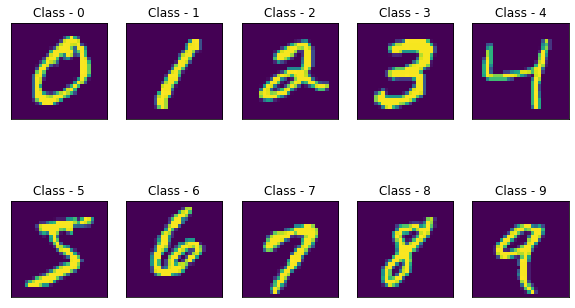

In [ ]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])




# Design CNN

### import Conv2D, MaxPool2D

In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [ ]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
c1f2 = keras.models.Sequential([ #순차모델 cf.함수모델
    Conv2D(input_shape=(28,28,1), filters= 32, #input_shape=(28,28,1): 컬러채널 포함, filters= 32: 32가지의 필터
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), 
            #kernel_size=(3,3): 2차원 필터 3x3, strides=(1,1): 좌 또는 우 이동 시 한칸씩 이동, padding='same': 가장자리쪽 나머지 0으로 채워 모두 convolution 되도록 => 30x30(convolution filter)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), #32*28*28, pool_size=(2,2): 2x2 사이즈로 최대값 찾아내기=>중복x(차원축소위해)=>strides=(2,2):2칸씩 이동
    #convolution 노드 - conv2d, maxpool2d(차원축소)

    #1차원 벡터로 바꾸기
    Flatten(), #max-pooling 된 2차원 행렬을 1차원 벡터로 바꾸는 함수

    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax') 
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy', #one-hot-encoding 했을 때
              metrics=['accuracy']) #정확도 중심으로 계산

In [ ]:
# #convolution layer
# Conv2D(input_shape=(28,28,1), filters= 32, #input_shape=(28,28,1): 컬러채널 포함, filters= 32: 32가지의 필터
#             kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), 
#             #kernel_size=(3,3): 2차원 필터 3x3, strides=(1,1): 좌 또는 우 이동 시 한칸씩 이동, padding='same': 가장자리쪽 나머지 0으로 채워 모두 convolution 되도록 => 30x30(convolution filter)
#     MaxPool2D(pool_size=(2,2), strides=(2,2)), #32*28*28, pool_size=(2,2): 2x2 사이즈로 최대값 찾아내기=>중복x(차원축소위해)=>strides=(2,2):2칸씩 이동
#     #convolution 노드 - conv2d, maxpool2d(차원축소)

#     #1차원 벡터로 바꾸기
#     Flatten(),

In [ ]:
c1f2.summary()
#conv2d (Conv2D)             (None, 28, 28, 32)        320 = 3*3*32+32    => 첫번째 convolution layer(3x3 filter)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
3*3*32+32 
#각 뉴런마다 bias 존재(+32)
#32개의 3x3 필터

320

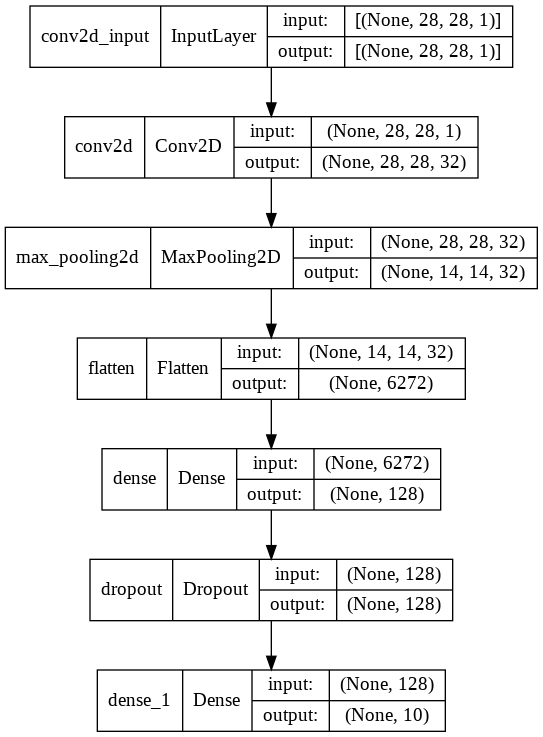

In [ ]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [ ]:
# c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
#             validation_data = (X_test, y_test))
#ValueError: Shapes (100, 10) and (100, 14, 14, 10) are incompatible - Flatten 하지 않음 - c1f2

c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test)) #test data로 검증

Epoch 1/20
600/600 [==============================] - 18s 8ms/step - loss: 0.2419 - accuracy: 0.9287 - val_loss: 0.0777 - val_accuracy: 0.9760
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0822 - accuracy: 0.9756 - val_loss: 0.0556 - val_accuracy: 0.9815
Epoch 3/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0576 - accuracy: 0.9829 - val_loss: 0.0451 - val_accuracy: 0.9845
Epoch 4/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0459 - accuracy: 0.9858 - val_loss: 0.0382 - val_accuracy: 0.9863
Epoch 5/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0368 - accuracy: 0.9888 - val_loss: 0.0423 - val_accuracy: 0.9863
Epoch 6/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0302 - accuracy: 0.9905 - val_loss: 0.0390 - val_accuracy: 0.9870
Epoch 7/20
600/600 [==============================] - 4s 7ms/step - loss: 0.0260 - accuracy: 0.9919 - val_loss: 0.0360 - val_accuracy: 0.9879
Epoch

In [ ]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0444 - accuracy: 0.9890


[0.044435445219278336, 0.9890000224113464]

---

## **CNN1 + FCN3**
- cnn1 + fcn3(= 2개의 hidden layer와 output layer = 3개의 층)

In [ ]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
c1f3 = tf.keras.models.Sequential([ 
    # tf.keras.layers.Flatten(input_shape=(28, 28)), 
    Conv2D(input_shape=(28,28,1), filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c1f3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               1605888   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 8ms/step - loss: 0.2415 - accuracy: 0.9269
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0746 - accuracy: 0.9772
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0526 - accuracy: 0.9841
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0368 - accuracy: 0.9888
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0300 - accuracy: 0.9901
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0231 - accuracy: 0.9925
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0203 - accuracy: 0.9937
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0177 - accuracy: 0.9945
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0159 - accuracy: 0.9948
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0130 - accuracy: 0.9958

In [ ]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 4ms/step - loss: 0.0449 - accuracy: 0.9900


[0.044858694076538086, 0.9900000095367432]

## **CNN2 + FCN2**
- convolution 2층 + fcn 2층

In [ ]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
c2f2 = tf.keras.models.Sequential([ 
    # tf.keras.layers.Flatten(input_shape=(28, 28)),
    # tf.keras.layers.Dense(256, activation='relu'),  
    # tf.keras.layers.Dropout(0.25),
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 1개 생성(filter = 64)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 2개 생성(filter = 32), input 정보는 첫 번째만 넣어줌
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(), #특징벡터로 만듦
    tf.keras.layers.Dense(128, activation='relu'),   
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c2f2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [ ]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100) #validation 없이 훈련만 시킴 -> 빠른 속도
#밑의 accuracy는 training에 대한 accuracy

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2203 - accuracy: 0.9332
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0661 - accuracy: 0.9795
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0471 - accuracy: 0.9859
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0369 - accuracy: 0.9887
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0303 - accuracy: 0.9902
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0230 - accuracy: 0.9926
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0176 - accuracy: 0.9941
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0139 - accuracy: 0.9953

In [ ]:
c2f2.evaluate(X_test, y_test, batch_size = 100) #convolution 층을 늘리면 정확도 증가

100/100 [==============================] - 1s 5ms/step - loss: 0.0321 - accuracy: 0.9922


[0.03205900266766548, 0.9922000169754028]

## **CNN2 + FCN3**

In [ ]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [ ]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64, 
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 1개 생성(filter = 64)
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32,
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'), #convolution layer 2개 생성(filter = 32), input 정보는 첫 번째만 넣어줌
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(), #특징벡터로 만듦
    tf.keras.layers.Dense(128, activation='relu'),  #fcn 1층  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(64, activation='relu'),   #fcn 2층
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax') #output layer - 3층
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
c2f3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_7 (Dense)             (None, 128)              

In [ ]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.3022 - accuracy: 0.9069
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0894 - accuracy: 0.9741
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0622 - accuracy: 0.9819
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0504 - accuracy: 0.9855
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0419 - accuracy: 0.9868
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0343 - accuracy: 0.9900
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0310 - accuracy: 0.9911
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0248 - accuracy: 0.9921
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0250 - accuracy: 0.9923
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0218 - accuracy: 0.9931

In [ ]:
c2f3.evaluate(X_test, y_test, batch_size = 100) #c2f2: 99.32, c2f3: 99.27(교수님 결과)
#층을 높이면 정확도 증가하지만 항상은 아님

100/100 [==============================] - 1s 5ms/step - loss: 0.0319 - accuracy: 0.9921


[0.0319475419819355, 0.9921000003814697]

# **[DIY] Hidden layer에 따른 정확도**

In [ ]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0444 - accuracy: 0.9890


[0.044435445219278336, 0.9890000224113464]

In [ ]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9900


[0.044858694076538086, 0.9900000095367432]

In [ ]:
c2f3.save('c2f3_best.hdf5')

In [ ]:
# Try another method!!
cnn_result = [[0.04707975313067436, 0.9884999990463257], 
 [0.05021820217370987, 0.9883999824523926], 
 [0.030393356457352638, 0.9918000102043152], 
 [0.0303812138736248, 0.9926999807357788]]

In [ ]:
# select accuracies
accuracy = [row[1] for row in cnn_result]
accuracy

[0.9884999990463257,
 0.9883999824523926,
 0.9918000102043152,
 0.9926999807357788]

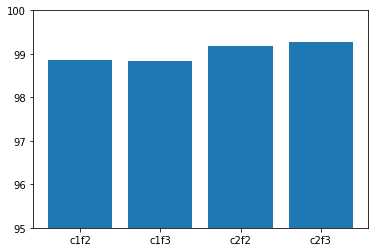

In [ ]:
x = np.arange(4)
cnns = ['c1f2','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95, 100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [ ]:
c2f2.save('c2f2_best.hdf5')

In [ ]:
from keras.models import load_model

model = load_model('c2f2_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0321 - accuracy: 0.9922


[0.03205900266766548, 0.9922000169754028]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [ ]:
#c2f2 모델 초기화 후 학습시킴, hist 객체에 정보를 담아야 함
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))

Epoch 1/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.0359 - val_accuracy: 0.9928
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 0.0376 - val_accuracy: 0.9927
Epoch 3/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0042 - accuracy: 0.9985 - val_loss: 0.0359 - val_accuracy: 0.9941
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0041 - accuracy: 0.9988 - val_loss: 0.0465 - val_accuracy: 0.9922
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.0438 - val_accuracy: 0.9923
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0030 - accuracy: 0.9990 - val_loss: 0.0392 - val_accuracy: 0.9929
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0044 - accuracy: 0.9985 - val_loss: 0.0423 - val_accuracy: 0.9909
Epo

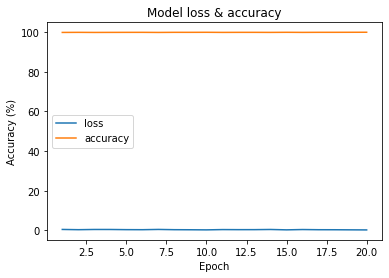

In [ ]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

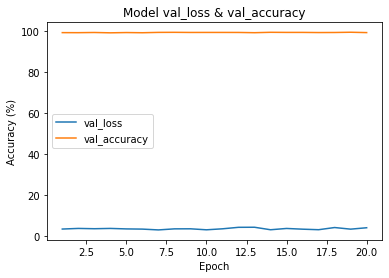

In [ ]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

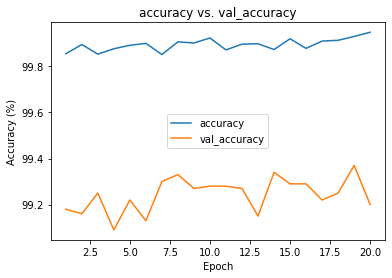

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [ ]:
from keras.models import load_model

model = load_model('c2f3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0492 - accuracy: 0.9933


[0.04924842715263367, 0.9933000206947327]

In [ ]:
# Code here!
hist = model.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size = 100, 
         validation_data=(X_test,y_test)) 

Epoch 1/20
600/600 [==============================] - 7s 11ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0461 - val_accuracy: 0.9932
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0492 - val_accuracy: 0.9928
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0439 - val_accuracy: 0.9935
Epoch 4/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0488 - val_accuracy: 0.9938
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 0.0510 - val_accuracy: 0.9927
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.0507 - val_accuracy: 0.9926
Epoch 7/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0046 - accuracy: 0.9989 - val_loss: 0.0444 - val_accuracy: 0.9943

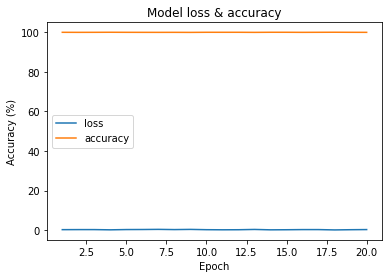

In [ ]:
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

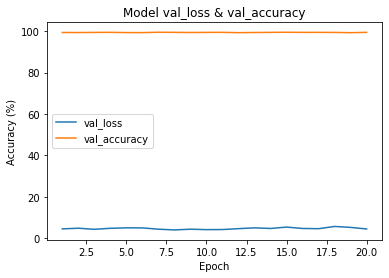

In [ ]:
vloss_list = [100 * i for i in hist.history['val_loss']]
vacc_list = [100 * i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')
plt.show()

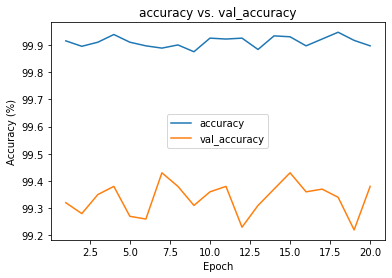

In [ ]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')